In [1]:
import pandas as pd

# Load your data into a Pandas DataFrame
data = pd.read_csv('./magic+gamma+telescope/magic04.data', header=None)

# Manually define the feature names based on the descriptions provided
feature_names = [
    "fLength",  # major axis of ellipse [mm]
    "fWidth",   # minor axis of ellipse [mm] 
    "fSize",    # 10-log of sum of content of all pixels [in #phot]
    "fConc",    # ratio of sum of two highest pixels over fSize  [ratio]
    "fConc1",   # ratio of highest pixel over fSize  [ratio]
    "fAsym",    # distance from highest pixel to center, projected onto major axis [mm]
    "fM3Long",  # 3rd root of third moment along major axis  [mm] 
    "fM3Trans", # 3rd root of third moment along minor axis  [mm]
    "fAlpha",   # angle of major axis with vector to origin [deg]
    "fDist",    # distance from origin to center of ellipse [mm]
    "class"     # gamma (signal), hadron (background)
]

# Assign the feature names to the columns of your DataFrame
data.columns = feature_names

# Now your DataFrame should have column names based on the provided feature names
print(data.head())


    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### OUTLIER DETECTION AND IMPUTATION

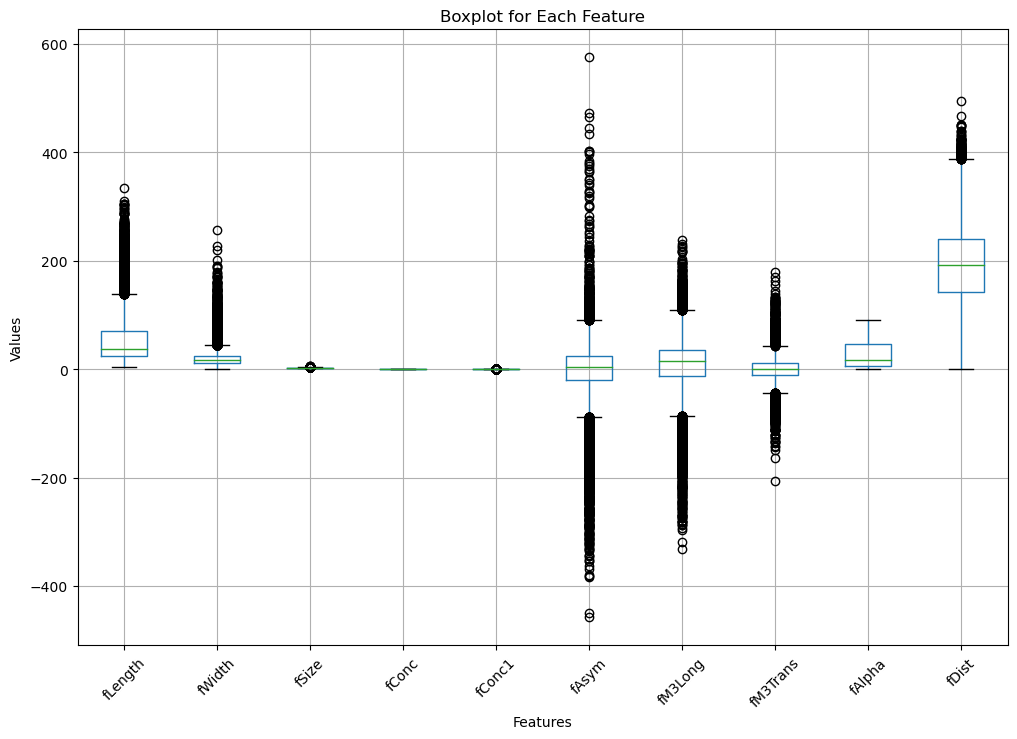

In [3]:
# Create boxplots for every feature
plt.figure(figsize=(12, 8), facecolor = "white")
data.boxplot()
plt.title('Boxplot for Each Feature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

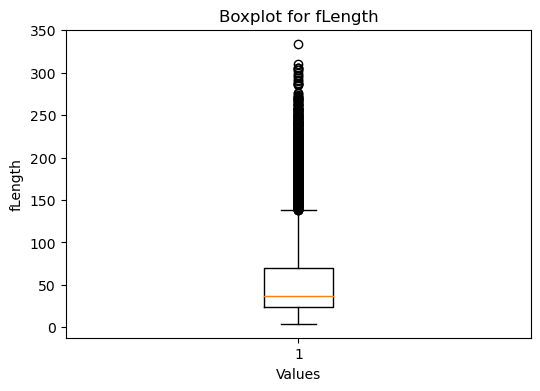

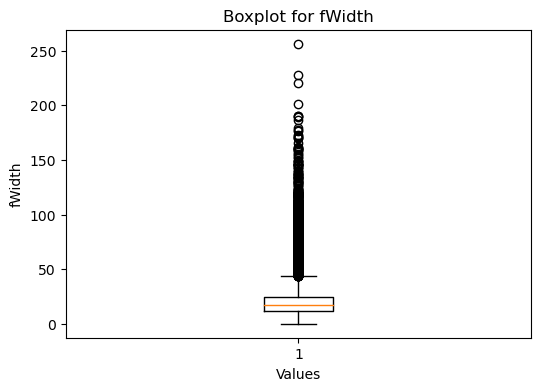

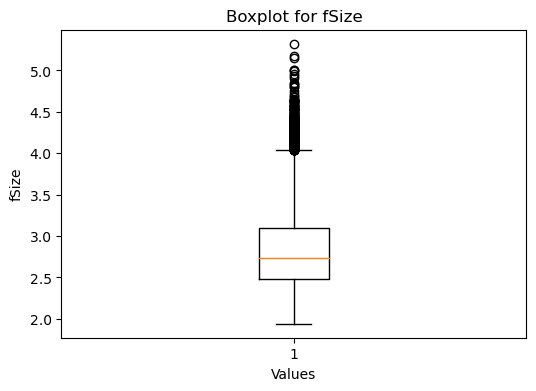

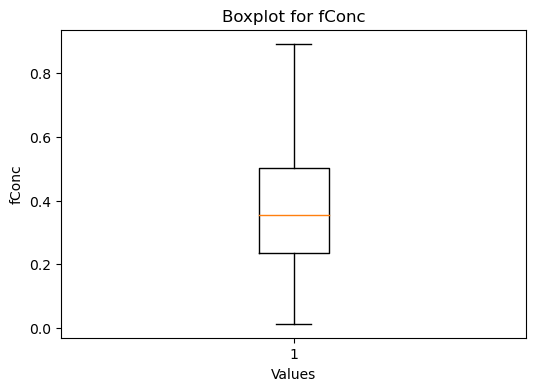

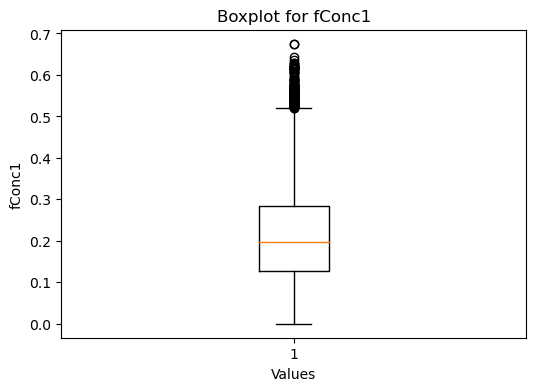

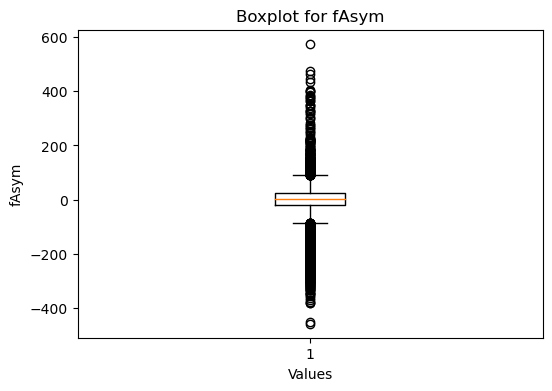

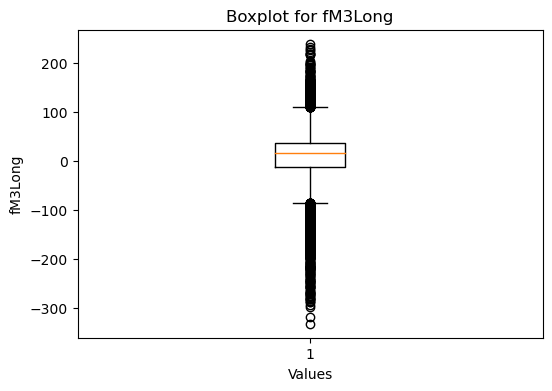

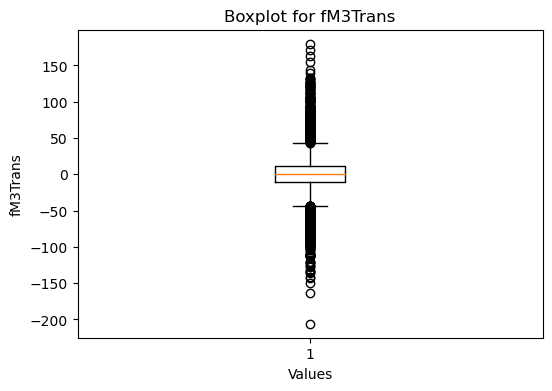

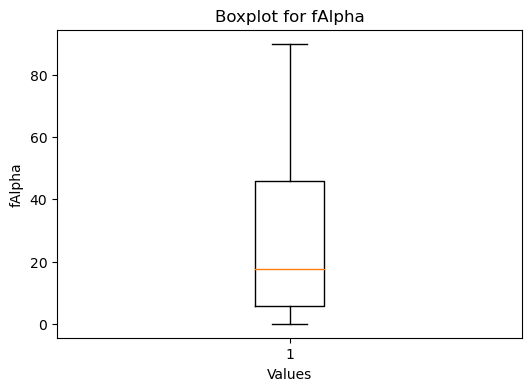

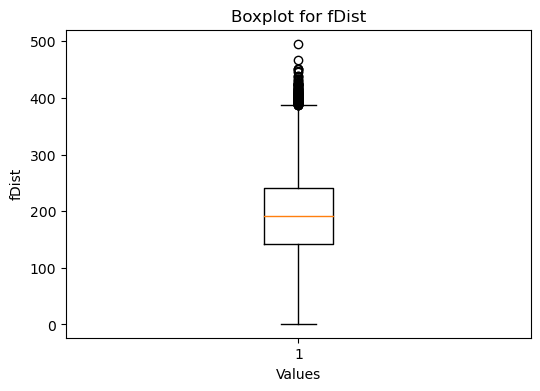

In [4]:
#Create a seperate boxplot for every feature
for column in data.columns:
    if column != 'class':
        plt.figure(figsize=(6, 4), facecolor = "white")
        plt.boxplot(data[column])
        plt.title(f'Boxplot for {column}')
        plt.xlabel('Values')
        plt.ylabel(column)
        plt.show()


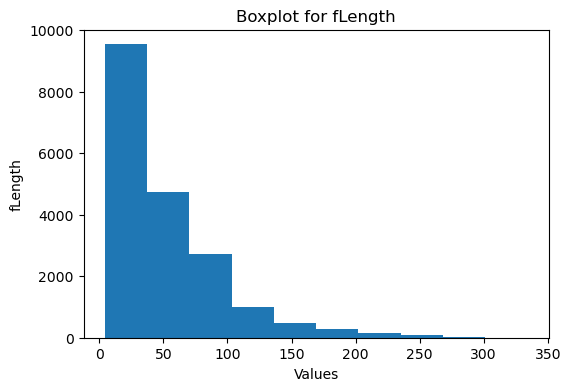

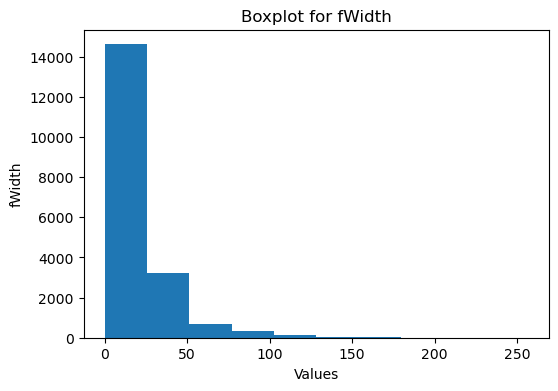

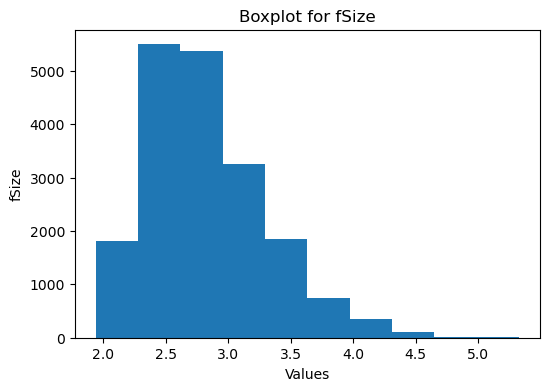

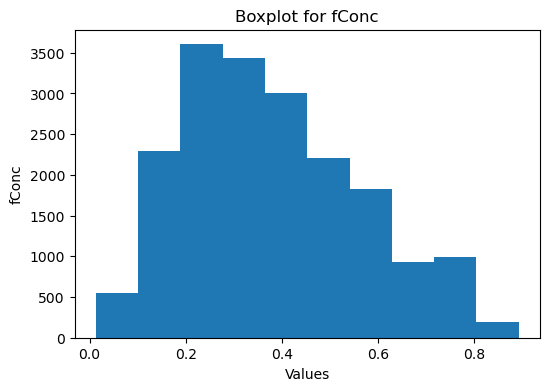

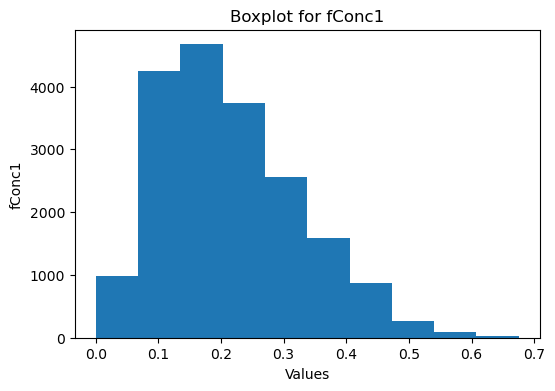

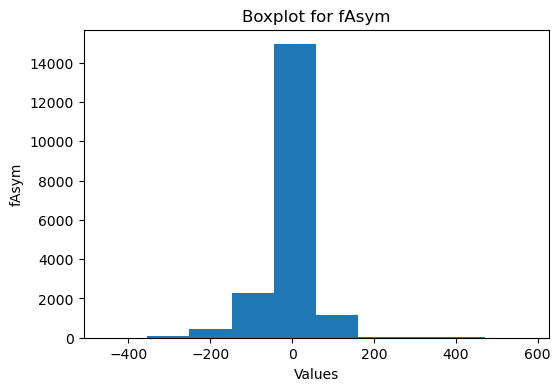

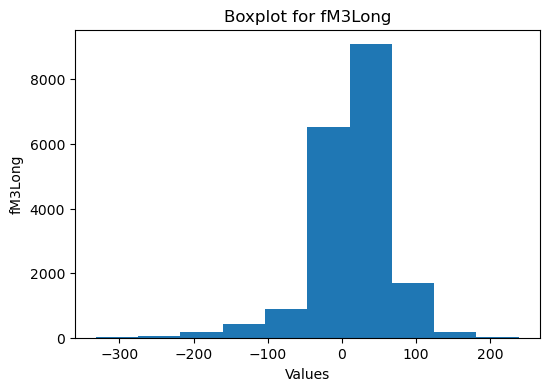

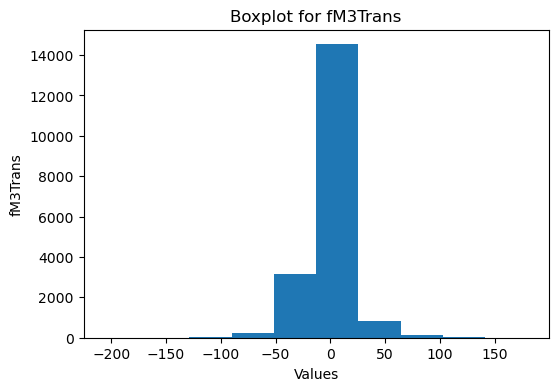

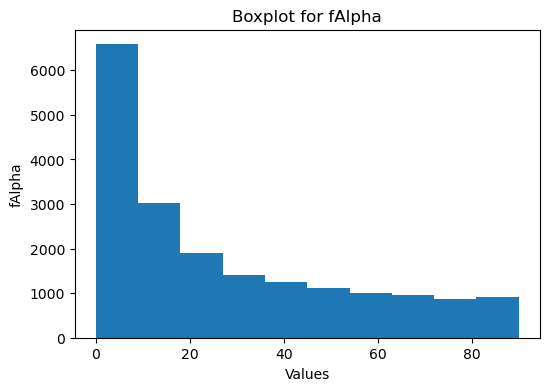

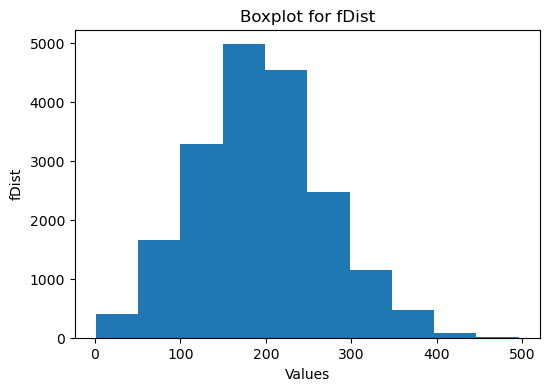

In [5]:
#Create a seperate boxplot for every feature
for column in data.columns:
    if column != 'class':
        plt.figure(figsize=(6, 4), facecolor = "white")
        plt.hist(data[column])
        plt.title(f'Boxplot for {column}')
        plt.xlabel('Values')
        plt.ylabel(column)
        plt.show()


In [6]:
# outlier imputation
predictors = data.drop("class", axis = 1)
for column in predictors.columns:
    q1 = np.percentile(predictors[column], 25)
    q3 = np.percentile(predictors[column], 75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    data.loc[data[column] <= lower_limit, column] = lower_limit
    data.loc[data[column] >= upper_limit, column] = upper_limit

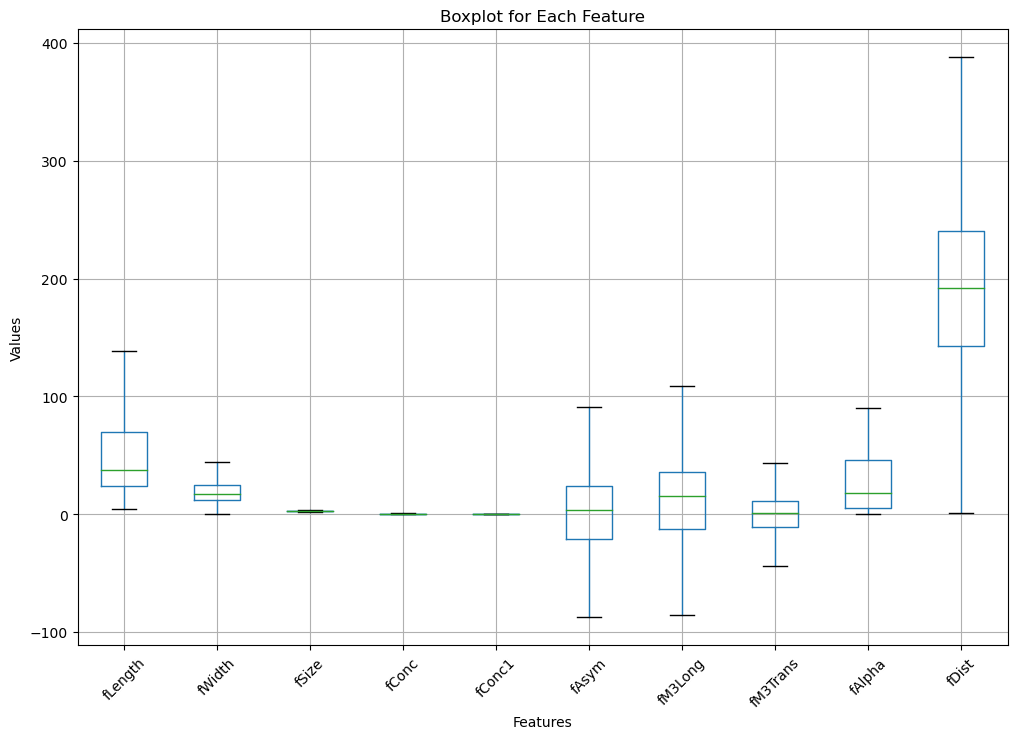

In [7]:
# Create boxplots for every feature after imputing outliers
plt.figure(figsize=(12, 8), facecolor = "white")
data.boxplot()
plt.title('Boxplot for Each Feature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

### MODELLING AND ACCURACY

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Data Prep
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7894)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.7883806519453207


In [9]:
from sklearn.svm import SVC

# Training the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_svm = svm.predict(X_test_scaled)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classification Accuracy:", accuracy_svm)

SVM Classification Accuracy: 0.786540483701367


### CONFUSION MATRICES

In [10]:
from sklearn.metrics import confusion_matrix

#Obtain the confusion matrix for logistic rtegression
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Logisitic Regression: ")
print(confusion_matrix_logreg)

Confusion matrix for Logisitic Regression: 
[[2192  225]
 [ 580  807]]


In [11]:
#Obtain the confusion matrix for SVM classification 
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix for SVM Classification: ")
print(confusion_matrix_svm)

Confusion matrix for SVM Classification: 
[[2181  236]
 [ 576  811]]


### HEATMAP FOR CONFUSION MATRICES 

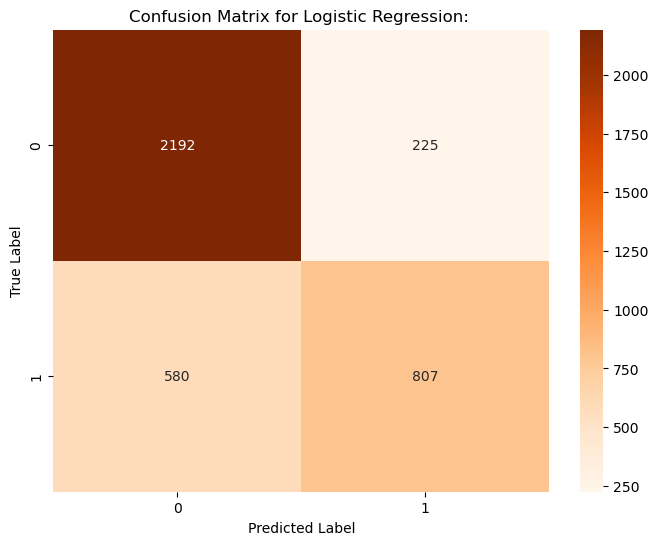

In [12]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_logreg, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix for Logistic Regression: ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

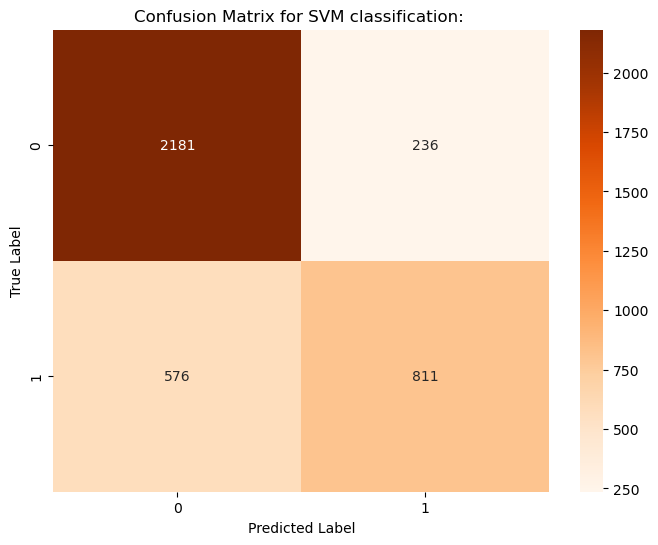

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix for SVM classification: ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## ROC curve and AuC values

The ROC curve and _Area under Curve_ metrics for the Logistic Regression and SVM models can be calculated as below:

In [14]:
# imports
from sklearn.metrics import roc_curve, auc
import seaborn


AUC:  0.7443703411815907


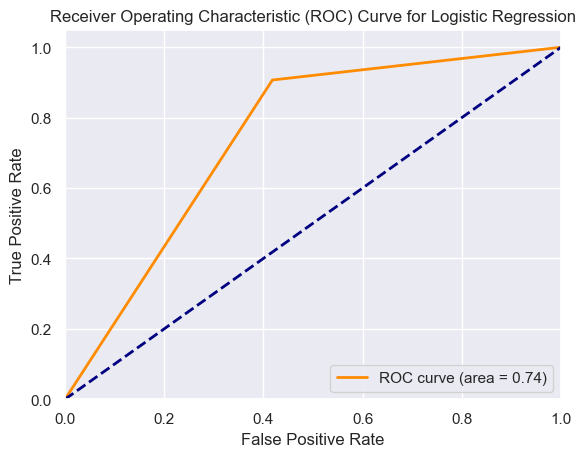

In [20]:
# plot roc curve for logreg

# logreg
y_test_binary = [1 if label == 'g' else 0 for label in y_test]
y_pred_binary = [1 if label == 'g' else 0 for label in y_pred]
fpr_lr, tpr_lr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc_lr = auc(fpr_lr, tpr_lr)
print("AUC: ", roc_auc_lr)

# Plot ROC curve
seaborn.set()

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The AuC for the logistic regression model is ~0.74, very similar to the SVM model as we see below.

AUC:  0.7435367540483937


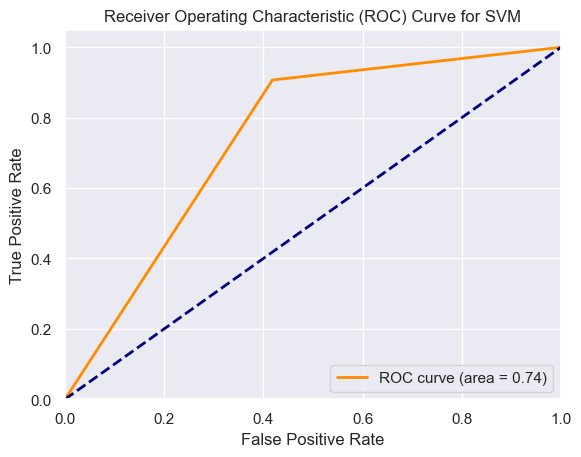

In [21]:
# svm
y_pred_svm_binary = [1 if label == 'g' else 0 for label in y_pred_svm]
fpr_svm, tpr_svm, thresholds = roc_curve(y_test_binary, y_pred_svm_binary)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("AUC: ", roc_auc_svm)

# Plot ROC curve
seaborn.set()

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()